In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from math import pi
from PlotMaker import PlotMaker
from Network import RingNetwork, SimpleMixedNetwork, MixedNetwork, PlasticMixedNetwork
from GridSearch import GridSearch

%matplotlib inline

In [2]:
plotmaker = PlotMaker()

## A classic ring network

In [3]:
network = RingNetwork(100)
num_steps = 500
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
m, f = network.simulate(input, alphas)

/home/chingf/Code/hf-memory-model/PlotMaker.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


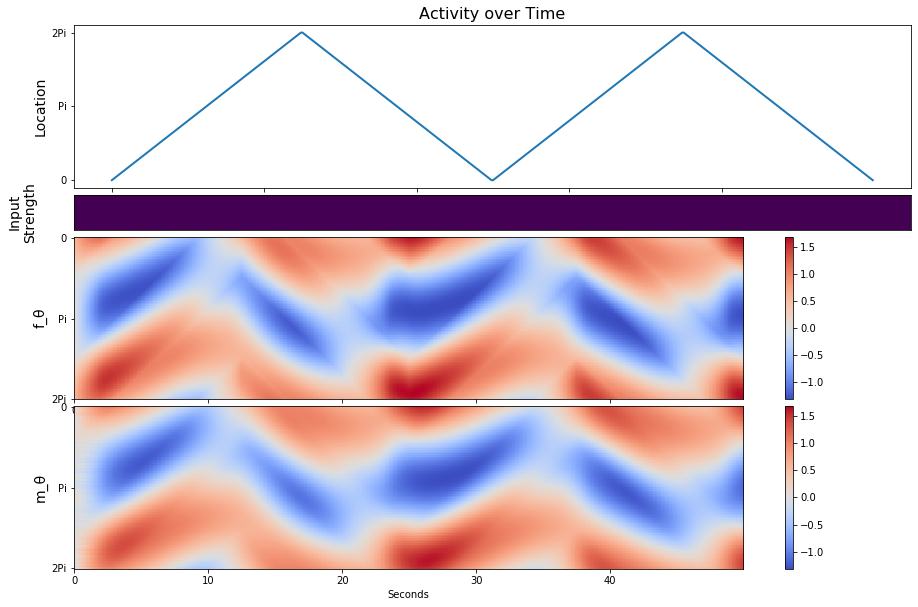

In [4]:
plotmaker.plot_main(input, alphas, f, m=m)

## A ring network with singular context-ring synapses

In [5]:
N = 100
N_c = 1
C = 1
indices_c = np.array([N//2])
network = SimpleMixedNetwork(N, N_c, C, indices_c)
num_steps = 1000
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
input[500:,] = 0
alphas[500:,] = 0
input_c[650:800, -1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

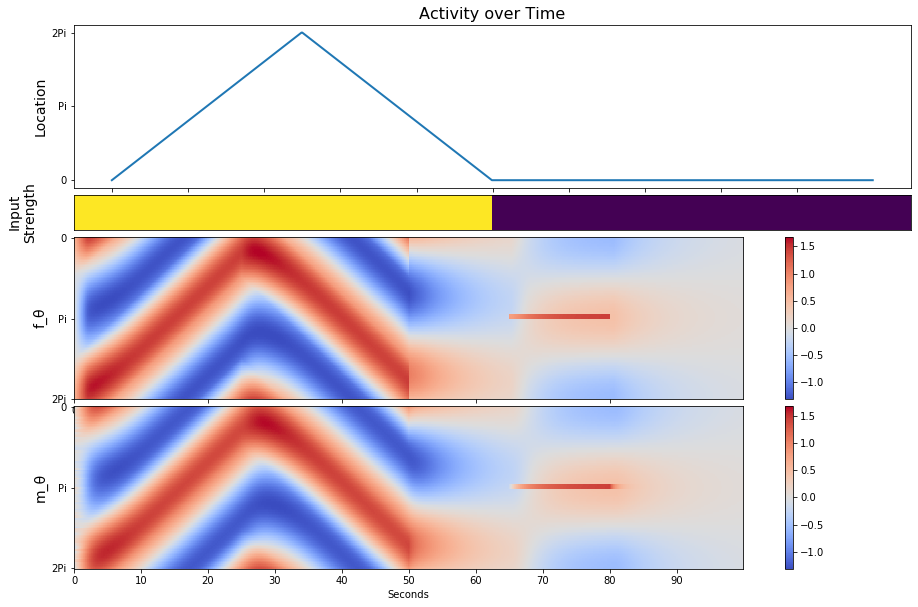

In [6]:
plotmaker.plot_main(input, alphas, f, m=m)

## A ring network with expanding context-ring synapses

In [7]:
N = 100
N_c = 2
C = 0.05
N_cr = 15
J_cr = 0.02
target_indices = np.array([N//2, 0])
np.random.seed(0)
network = MixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
# network.ring_indices= np.array([97])
# network._init_J()
num_steps = 1000
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:,] = 0
input_c[650:800, 0] = 1
input_c[850:, 1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

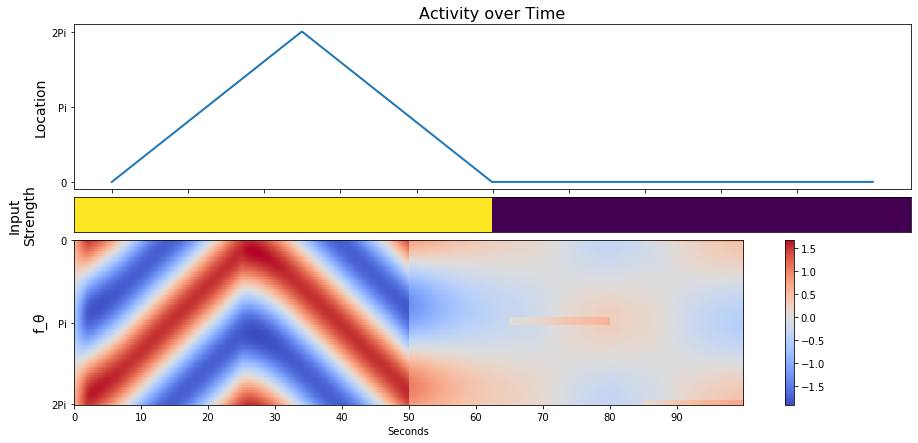

In [8]:
plotmaker.plot_main(input, alphas, f)

## Spooky network

In [9]:
N = 100
N_c = 1
C = 1
N_cr = 40
J_cr = 0.06
target_indices = np.array([N//2])
network = PlasticMixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:1000,] = 0
input_c[650:800, 0] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

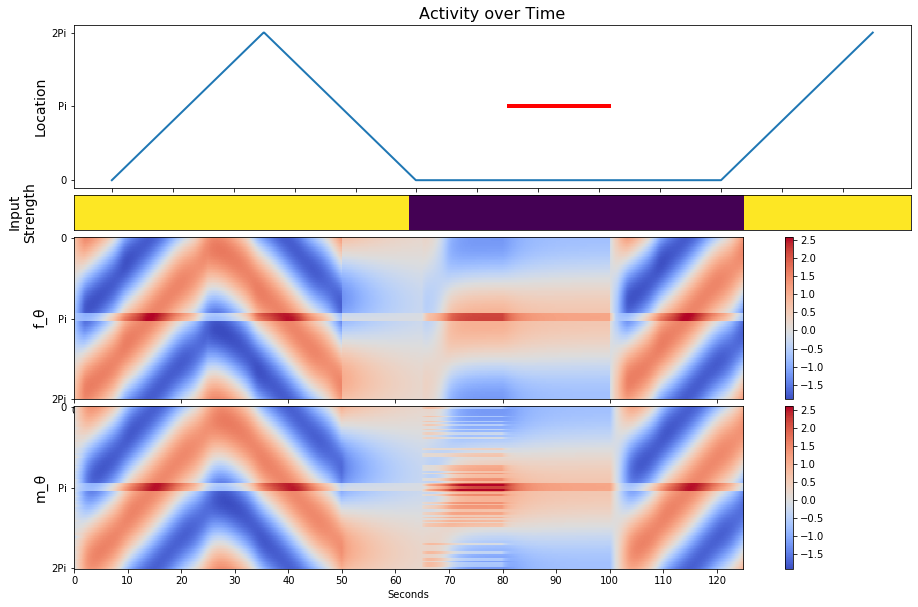

In [10]:
plotmaker.plot_main(
    input, alphas, f, input_c, target_indices/N, m
    )

In [11]:
#### N = 100
N = 100
N_c = 2
C = 1
N_cr = 49
J_cr = 0.06
target_indices = np.array([N//2, 0])
network = PlasticMixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:1000,] = 0
input_c = np.zeros((input.size, N_c))
input_c[650:800, 0] = 1
input_c[850:950, 1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

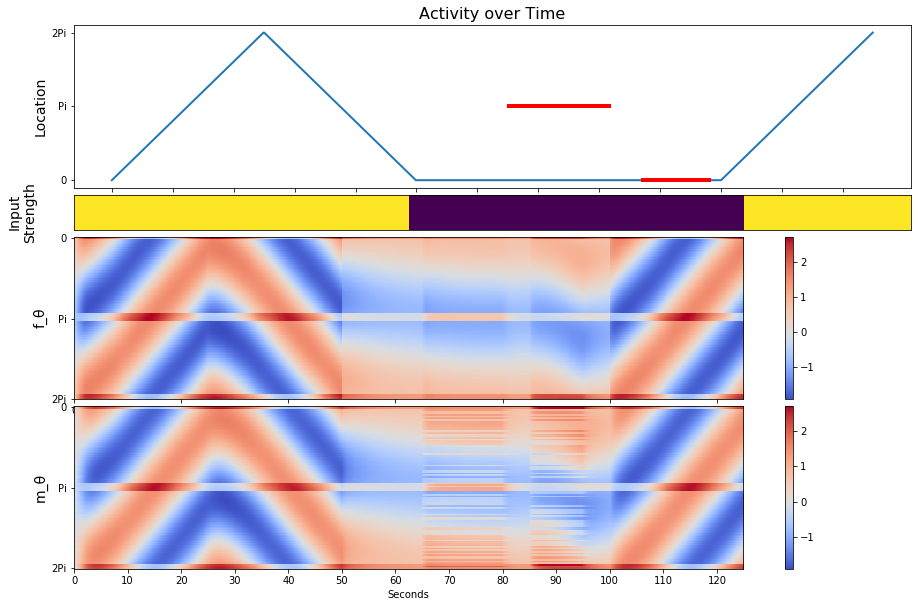

In [12]:
plotmaker.plot_main(
    input, alphas, f, input_c, target_indices/N, m
    )